F:\kdesk\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\kdesk\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\kdesk\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38663 (\N{CJK UNIFIED IDEOGRAPH-9707}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\kdesk\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


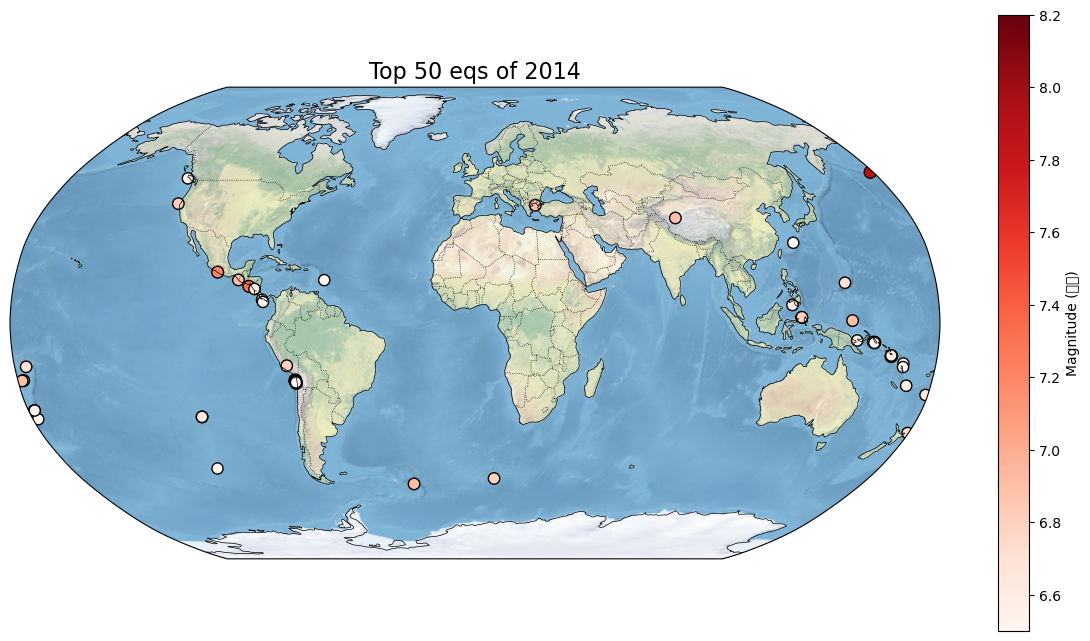

In [30]:
#1. Global Earthquakes
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 设置文件路径 (修改为实际路径)
file_path_csv = r'C:\Users\Administrator\usgs_earthquakes.csv' 

# 读取CSV数据文件
earthquakes_data = pd.read_csv(file_path_csv)

# 数据清洗：选择需要的列并去除缺失值
filtered_data = earthquakes_data_csv[['latitude', 'longitude', 'mag']].dropna()

# 确保数据类型正确
filtered_data['latitude'] = pd.to_numeric(filtered_data['latitude'], errors='coerce')
filtered_data['longitude'] = pd.to_numeric(filtered_data['longitude'], errors='coerce')
filtered_data['mag'] = pd.to_numeric(filtered_data['mag'], errors='coerce')

# 再次移除无效数据
filtered_data = filtered_data.dropna()

# 按震级排序，选择震级最高的50次地震
top_50_earthquakes = filtered_data.nlargest(50, 'mag')

# 绘制地图
plt.figure(figsize=(15, 8))  # 设置图像大小
ax = plt.axes(projection=ccrs.Robinson())  # 使用 Mollweide 投影
ax.set_global()  # 设置为全球范围

# 添加背景：海洋蓝色，陆地绿色（根据植被分布）
ax.stock_img()  # Cartopy 提供的默认高分辨率图像背景

# 添加海岸线和国家边界
ax.coastlines(color='black', linewidth=0.5)  # 添加海岸线
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')  # 添加国家边界

# 绘制地震点
scatter = plt.scatter(
    top_50_earthquakes['longitude'],  # 经度
    top_50_earthquakes['latitude'],   # 纬度
    c=top_50_earthquakes['mag'],      # 点的颜色与震级相关
    cmap='Reds',                          # 使用红色渐变
    s=top_50_earthquakes['mag'] * 10, # 点大小与震级相关
    edgecolor='black',                    # 点边缘颜色
    transform=ccrs.PlateCarree()          # 经纬度的投影转换
)

# 添加颜色条和标题
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.05)  # 添加颜色条
cbar.set_label('Magnitude (震级)')  # 颜色条标签
plt.title('Top 50 eqs of 2014', fontsize=16)  # 添加标题

# 显示地图
plt.show()


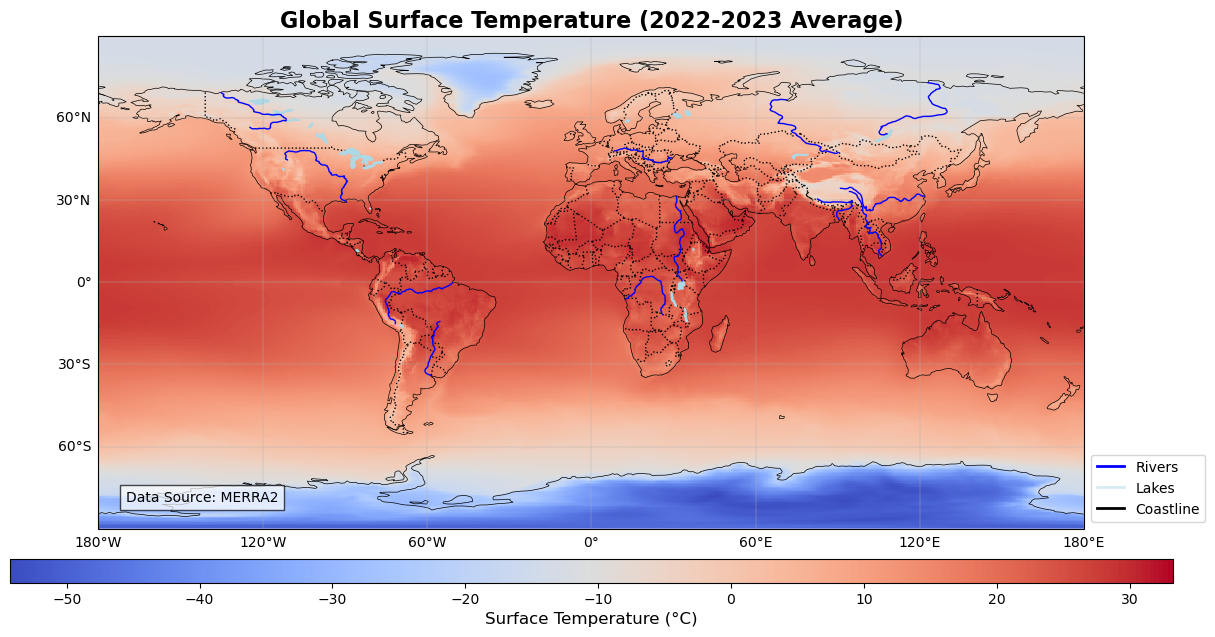

In [95]:
#2.1
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# 生成文件路径列表，用的第三次作业最后一题数据
file_paths = [
    f"MERRA2_400.instM_2d_asm_Nx.{year}{month:02d}.nc4"
    for year in range(2022, 2024)  # 2022到2023
    for month in range(1, 13)      # 从1月到12月
]

# 打开多个文件并合并成一个大数据集
ds = xr.open_mfdataset(file_paths, combine='by_coords')

# 提取温度变量（假设变量名为 'T2M'，地表温度），并计算多年的平均值
temperature = ds['T2M'].mean(dim='time') - 273.15  # 转换为摄氏度

# 创建地图
plt.figure(figsize=(15, 8))  # 设置图像大小
ax = plt.axes(projection=ccrs.PlateCarree())  # 使用 PlateCarree 投影
ax.set_global()  # 设置为全球范围

# 添加海洋和陆地特征
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1.0)  # 添加国家边界
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)  # 添加海岸线
lakes = ax.add_feature(cfeature.LAKES, edgecolor='lightblue', facecolor='lightblue', zorder=2)#添加湖
rivers = ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)#添加河

# 绘制温度分布
temp_plot = plt.pcolormesh(
    temperature['lon'], temperature['lat'], temperature,
    transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto'
)

# 添加色条
cbar = plt.colorbar(temp_plot, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Surface Temperature (°C)', fontsize=12)

# 添加网格线和标签
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.3)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# 添加标题和坐标轴标签
plt.title('Global Surface Temperature (2022-2023 Average)', fontsize=16, weight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 创建自定义图例
legend_elements = [
    plt.Line2D([0], [0], color='blue', lw=2, label='Rivers'),
    plt.Line2D([0], [0], color='lightblue', lw=2, label='Lakes', alpha=0.5),
    plt.Line2D([0], [0], color='black', lw=2, label='Coastline')
]

# 添加图例
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0), fontsize=10)

# 添加文本框注释
plt.text(-170, -80, 'Data Source: MERRA2', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# 显示图像
plt.show()


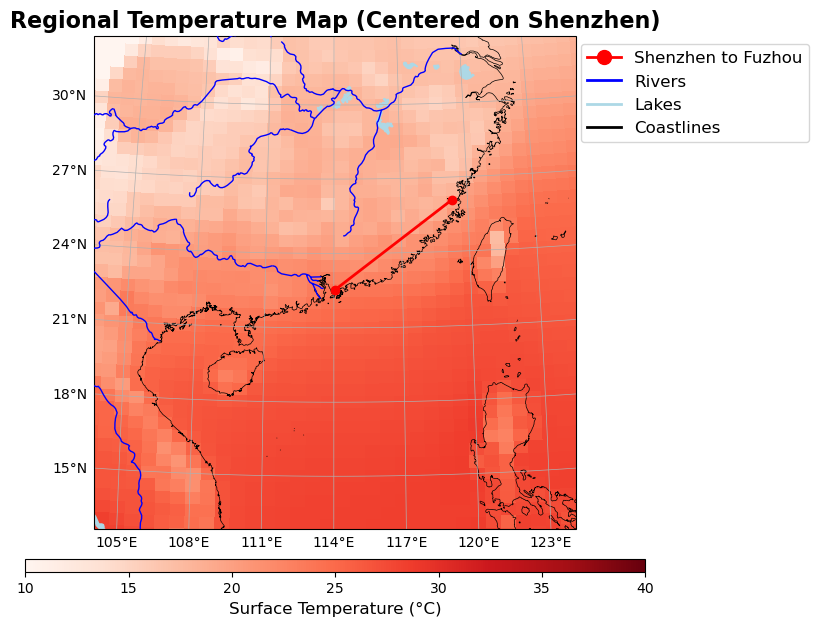

In [91]:
#2.2
# 生成文件路径列表，用的第三次作业最后一题数据
file_paths = [
    f"MERRA2_400.instM_2d_asm_Nx.{year}{month:02d}.nc4"
    for year in range(2022, 2024)  # 2022到2023
    for month in range(1, 13)      # 从1月到12月
]

# 打开多个文件并合并成一个大数据集
ds = xr.open_mfdataset(file_paths, combine='by_coords')

# 提取温度变量（假设变量名为 'T2M'），并转换为摄氏度
temperature = ds['T2M'] - 273.15  # 转换为摄氏度
temperature = temperature.mean(dim='time')  # 按时间取平均值

# 定义深圳位置和区域范围
central_lon, central_lat = 114.06, 22.54  # 深圳经纬度
extent = [central_lon - 10, central_lon + 10, central_lat - 10, central_lat + 10]  # 区域范围

# 创建图像
plt.figure(figsize=(8, 8), dpi=100)
proj = ccrs.Orthographic(central_lon, central_lat)  # 使用正交投影
ax = plt.axes(projection=proj)

# 设置地图范围
ax.set_extent(extent, crs=ccrs.PlateCarree())

# 添加地理特征
land = ax.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=1)
ocean = ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)
lakes = ax.add_feature(cfeature.LAKES, edgecolor='lightblue', facecolor='lightblue', zorder=2)
rivers = ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)
ax.coastlines(resolution='10m', linewidth=0.5)

# 绘制温度分布，使用红色渐变
temp_plot = ax.pcolormesh(
    temperature['lon'], temperature['lat'], temperature,
    transform=ccrs.PlateCarree(), cmap='Reds', shading='auto',
    vmin=10, vmax=40  # 设置颜色柱范围
)

# 添加色条
cbar = plt.colorbar(temp_plot, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Surface Temperature (°C)', fontsize=12)

# 添加网格线和格式化
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# 添加标题
plt.title('Regional Temperature Map (Centered on Shenzhen)', fontsize=16, weight='bold')

# 定义深圳和福州的经纬度
lons = [114.06, 119.3]  # 深圳到福州的经度
lats = [22.54, 26.08]   # 深圳到福州的纬度

# 在地图上标记深圳到福州的路径
shenzhen_to_fuzhou, = ax.plot(lons, lats, 'ro-', transform=ccrs.PlateCarree(), markersize=6, linewidth=2)

# 创建一个空的图例
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=2, label='Shenzhen to Fuzhou',marker='o', markersize=10, markerfacecolor='red'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Rivers'),
    plt.Line2D([0], [0], color='lightblue', lw=2, label='Lakes'),
    plt.Line2D([0], [0], color='black', lw=2, label='Coastlines')
]

# 添加图例
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.5, 1.0), fontsize=12)

# 显示图像
plt.show()

In [83]:
import json
from nbformat import read, write

def extract_comments_from_cell(cell):
    comments = []
    for line in cell.source.split('\n'):
        if line.strip().startswith('#'):
            comments.append(line)
    return comments

def extract_comments_from_notebook(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = read(f, as_version=4)
    comments = []
    for cell in nb.cells:
        if cell.cell_type == 'code':
            comments.extend(extract_comments_from_cell(cell))
    return comments

# 替换为你的Jupyter Notebook文件路径
notebook_path = 'PS4.ipynb'
comments = extract_comments_from_notebook(notebook_path)

# 将批注保存到文本文件
with open('comments.txt', 'w', encoding='utf-8') as f:
    for comment in comments:
        f.write(comment + '\n')

# 打印批注
comments

['#1. Global Earthquakes',
 '# 设置文件路径 (修改为实际路径)',
 '# 读取CSV数据文件',
 '# 数据清洗：选择需要的列并去除缺失值',
 '# 确保数据类型正确',
 '# 再次移除无效数据',
 '# 按震级排序，选择震级最高的50次地震',
 '# 绘制地图',
 '# 添加背景：海洋蓝色，陆地绿色（根据植被分布）',
 '# 添加海岸线和国家边界',
 '# 绘制地震点',
 '# 添加颜色条和标题',
 '# 显示地图',
 '#2.1',
 '# 生成文件路径列表，用的第三次作业最后一题数据',
 '# 打开多个文件并合并成一个大数据集',
 "# 提取温度变量（假设变量名为 'T2M'，地表温度），并计算多年的平均值",
 '# 创建地图',
 '# 添加海洋和陆地特征',
 '# 绘制温度分布',
 '# 添加色条',
 '# 添加网格线和标签',
 '# 添加标题和坐标轴标签',
 '# 添加文本框注释',
 '# 显示图像',
 '#2.2',
 '# 生成文件路径列表，用的第三次作业最后一题数据',
 '# 打开多个文件并合并成一个大数据集',
 "# 提取温度变量（假设变量名为 'T2M'），并转换为摄氏度",
 '# 定义深圳位置和区域范围',
 '# 创建图像',
 '# 设置地图范围',
 '# 添加地理特征',
 '# 绘制温度分布，使用红色渐变',
 '# 添加色条',
 '# 添加网格线和格式化',
 '# 添加标题',
 '# 定义深圳和福州的经纬度',
 '# 在地图上标记深圳到福州的路径',
 '# 创建一个空的图例',
 '# 添加图例',
 '# 显示图像']